# Loading and Preprocessing the data

In [ ]:
import pandas as pd

target= pd.read_csv('/content/target_gold.csv')
target.rename(columns={'date': 'Date'}, inplace=True)
target = target.rename(columns=lambda x: 'target_' + x if x != 'Date' else x)
target['Date'] = pd.to_datetime(target['Date'])


vix = pd.read_csv('/content/vix_index.csv')
vix = vix.rename(columns=lambda x: 'vix_' + x if x != 'Date' else x)
vix['Date'] = pd.to_datetime(vix['Date'])

vxeem = pd.read_csv('/content/vxeem_index.csv')
vxeem = vxeem.rename(columns=lambda x: 'vxeem_' + x if x != 'Date' else x)
vxeem['Date'] = pd.to_datetime(vxeem['Date'])


data = pd.read_csv('/content/dataset.csv')
data['Date'] = pd.to_datetime(data['Date'])
cols_to_drop = ['Open', 'High', 'Low',  'OPEN_x', 'HIGH_x', 'LOW_x', 'CLOSE_x', 'OPEN_y', 'HIGH_y', 'LOW_y', 'CLOSE_y']
data = data.drop(columns=cols_to_drop)
data = data.rename(columns={'Close': 'gold_closing'})

data = pd.merge(data, vxeem, on='Date', how='left')
data = pd.merge(data, vix, on='Date', how='left')
data = pd.merge(data, target, on='Date', how='left')

cols = list(data.columns)
cols.remove('gold_closing')
cols.append('gold_closing')
data = data[cols]
data = data.fillna(method='ffill')
data.dropna()

def create_lagged_and_rolling_features(data, lag_days=7, window_size=7):

    data[f'gold_closing_lag_{lag_days}'] = data['gold_closing'].shift(lag_days)
    data[f'gold_closing_{window_size}day_avg'] = data['gold_closing'].rolling(window=window_size).mean()

    return data

data = create_lagged_and_rolling_features(data, lag_days=7, window_size=7)

data[f'gold_closing_lag_7'] = data[f'gold_closing_lag_7'].fillna(data['gold_closing'])
data[f'gold_closing_7day_avg'] = data[f'gold_closing_7day_avg'].fillna(data['gold_closing'])

<ipython-input-124-3e84a998af04>:36: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data = data.fillna(method='ffill')


In [ ]:
data.columns

Index(['Date', 'stock_0_food_beverages_and_tobacco_close_price',
       'stock_10_non-banking_financial_services_close_price',
       'stock_11_real_estate_close_price',
       'stock_12_non-banking_financial_services_close_price',
       'stock_14_it_&_media_close_price',
       'stock_1_energy_and_support_services_close_price',
       'stock_2_basic_resources_close_price',
       'stock_3_basic_resources_close_price', 'stock_4_banks_close_price',
       'stock_5_banks_close_price', 'stock_6_real_estate_close_price',
       'stock_7_real_estate_close_price', 'stock_8_real_estate_close_price',
       'stock_9_non-banking_financial_services_close_price',
       'stock_0_food_beverages_and_tobacco_volume',
       'stock_10_non-banking_financial_services_volume',
       'stock_11_real_estate_volume',
       'stock_12_non-banking_financial_services_volume',
       'stock_14_it_&_media_volume',
       'stock_1_energy_and_support_services_volume',
       'stock_2_basic_resources_volume', 'st

Data augmentation

In [ ]:
data['oil_EU_pct_change'] = data['Europe Brent Crude Oil (Dollars per Barrel)'].pct_change() * 100
data['oil_WTI_pct_change'] = data['WTI Oil Price FOB (Dollars per Barrel)'].pct_change() * 100

In [ ]:
def create_lagged_features(data, column_name, lag_days=7):

    data[f'{column_name}_lag_{lag_days}'] = data[column_name].shift(lag_days)
    return data

data = create_lagged_features(data, 'vxeem_CLOSE', lag_days=7)
data = create_lagged_features(data, 'vix_CLOSE', lag_days=7)
data = create_lagged_features(data, 'EFFR', lag_days=7)


In [ ]:
data = create_lagged_and_rolling_features(data, lag_days=1, window_size=2)

In [ ]:
data = create_lagged_features(data,'stock_3_basic_resources_close_price', lag_days=7)
data = create_lagged_features(data,'oil_EU_pct_change', lag_days=7)

In [ ]:
data.dropna()

,Date,stock_0_food_beverages_and_tobacco_close_price,stock_10_non-banking_financial_services_close_price,stock_11_real_estate_close_price,stock_12_non-banking_financial_services_close_price,stock_14_it_&_media_close_price,stock_1_energy_and_support_services_close_price,stock_2_basic_resources_close_price,stock_3_basic_resources_close_price,stock_4_banks_close_price,...,gold_closing_7day_avg,oil_EU_pct_change,oil_WTI_pct_change,vxeem_CLOSE_lag_7,vix_CLOSE_lag_7,EFFR_lag_7,gold_closing_lag_1,gold_closing_2day_avg,stock_3_basic_resources_close_price_lag_7,oil_EU_pct_change_lag_7
8,2020-01-09,15.03,2.20,8.05,8.00,7.90,3.47,20.31,8.37,43.50,...,795.142857,-1.084534,-0.150880,16.96,12.47,1.55,808.0,796.5,9.80,0.000000
9,2020-01-10,15.03,2.20,8.05,8.00,7.90,3.47,20.31,8.37,43.50,...,795.285714,0.285371,-0.906649,18.31,14.02,1.55,785.0,786.0,9.80,3.027591
10,2020-01-11,15.03,2.20,8.05,8.00,7.90,3.47,20.31,8.37,43.50,...,794.714286,0.000000,0.000000,18.31,14.02,1.55,787.0,787.0,9.80,0.000000
11,2020-01-12,14.99,2.31,8.19,8.00,7.85,3.50,20.53,8.70,43.50,...,794.428571,0.000000,0.000000,18.31,14.02,1.55,787.0,788.5,8.88,0.000000
12,2020-01-13,15.09,2.38,8.20,8.00,7.85,3.45,20.60,8.67,43.37,...,792.000000,-3.938895,-1.440190,17.63,13.85,1.55,790.0,787.5,8.12,1.693688
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,2023-12-27,26.76,3.31,24.16,18.34,5.46,9.91,82.63,89.80,19.54,...,3580.285714,0.922348,-2.017405,17.80,13.67,5.33,3806.0,3748.5,82.60,1.603608
1457,2023-12-28,28.07,3.36,23.85,18.81,5.50,9.84,83.35,89.95,20.76,...,3598.142857,-2.383599,-3.081685,18.56,13.65,5.33,3691.0,3611.0,80.97,-0.456227
1458,2023-12-29,28.07,3.36,23.85,18.81,5.50,9.84,83.35,89.95,20.76,...,3611.142857,-1.707996,-0.180505,17.31,13.03,5.33,3531.0,3554.0,80.97,-0.619348
1459,2023-12-30,28.07,3.36,23.85,18.81,5.50,9.84,83.35,89.95,20.76,...,3632.285714,0.000000,0.000000,17.31,13.03,5.33,3577.0,3605.5,80.97,0.000000


# RFE WITH XGOOST

In [ ]:
data.columns

Index(['Date', 'stock_0_food_beverages_and_tobacco_close_price',
       'stock_10_non-banking_financial_services_close_price',
       'stock_11_real_estate_close_price',
       'stock_12_non-banking_financial_services_close_price',
       'stock_14_it_&_media_close_price',
       'stock_1_energy_and_support_services_close_price',
       'stock_2_basic_resources_close_price',
       'stock_3_basic_resources_close_price', 'stock_4_banks_close_price',
       'stock_5_banks_close_price', 'stock_6_real_estate_close_price',
       'stock_7_real_estate_close_price', 'stock_8_real_estate_close_price',
       'stock_9_non-banking_financial_services_close_price',
       'stock_0_food_beverages_and_tobacco_volume',
       'stock_10_non-banking_financial_services_volume',
       'stock_11_real_estate_volume',
       'stock_12_non-banking_financial_services_volume',
       'stock_14_it_&_media_volume',
       'stock_1_energy_and_support_services_volume',
       'stock_2_basic_resources_volume', 'st

In [ ]:
from xgboost import XGBRegressor
from sklearn.feature_selection import SequentialFeatureSelector
import pandas as pd

data1 = data.copy().sort_values('Date')
X = data1.drop(['target_pct_change', 'Date'], axis=1)
y = data1['target_pct_change']

xgb_model = XGBRegressor()

# Initialize Sequential Feature Selector
sfs = SequentialFeatureSelector(estimator=xgb_model,
                                 n_features_to_select=10,
                                 direction='forward')

# Fit SFS
sfs.fit(X, y)

selected_features = X.columns[sfs.get_support()]
print("Selected Features by SFS:")
print(selected_features)


Exception ignored on calling ctypes callback function: <bound method DataIter._next_wrapper of <xgboost.data.SingleBatchInternalIter object at 0x79c76acdac50>>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/xgboost/core.py", line 582, in _next_wrapper
    def _next_wrapper(self, this: None) -> int:  # pylint: disable=unused-argument
KeyboardInterrupt: 
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
1 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 8

Selected Features by SFS:
Index(['CSUSHPINSA', 'Headline (m/m)', 'Core (m/m)', 'Regulated Items (m/m)',
       'Fruits and Vegetables (m/m)', 'Headline (y/y)', 'Core (y/y)',
       'Regulated Items (y/y)', 'Fruits and Vegetables (y/y)',
       'Overnight Deposit Rate'],
      dtype='object')


In [ ]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

X_selected = X[selected_features]
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, shuffle = False)

xgb = XGBRegressor()

param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.3],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 5, 10],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# Apply grid search
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5, verbose=1)
grid_search.fit(X_train, y_train)

# Get best parameters
print("Best parameters:", grid_search.best_params_)

Fitting 5 folds for each of 729 candidates, totalling 3645 fits
Best parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.01, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 100, 'subsample': 1.0}


In [ ]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split

X_selected = X[selected_features]

X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, shuffle = False)

xgb = XGBRegressor()

best_model = XGBRegressor(
    n_estimators= 100,
    learning_rate= 0.01,
    max_depth= 5,
    min_child_weight=1,
    subsample=1,
    colsample_bytree=1
)

best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

In [ ]:
import time
from sklearn.metrics import mean_squared_error, f1_score
import numpy as np

start_time = time.time()
end_time = time.time()
inference_time = end_time - start_time

    # Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    # Calculate Mean Directional Accuracy (MDA)
mda = np.mean(np.sign(np.diff(y_test)) == np.sign(np.diff(y_pred)))

    # Bucketize the true and predicted values into quartiles and calculate F1 score
y_test_buckets = pd.qcut(y_test, 4, labels=False)
y_pred_buckets = pd.qcut(y_pred, 4, labels=False)
f1 = f1_score(y_test_buckets, y_pred_buckets, average='weighted')

    # Print the evaluation metrics
print(f'Root Mean Squared Error: {rmse}') #1.37
print(f'Mean Directional Accuracy: {mda}')
print(f'Bucketized F1 Score: {f1}')
print(f'Inference Time (seconds): {inference_time}')

Root Mean Squared Error: 1.6616465229969786
Mean Directional Accuracy: 0.3047945205479452
Bucketized F1 Score: 0.3511799573260996
Inference Time (seconds): 2.47955322265625e-05


In [ ]:
# prompt: save the pkl

import pickle

# Save the model to a file
filename = 'xgb_model_last.pkl'
pickle.dump(best_model, open(filename, 'wb'))


Boosting Method for XGBoost

In [ ]:
X_selected = X[selected_features]

X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, shuffle = False)

xgb_model = XGBRegressor(
    n_estimators=100,
    booster='dart',  #  DART booster
    rate_drop=0.1,
    sample_type='uniform',
    normalize_type='tree'
)

xgb_model.fit(X_train, y_train)
initial_model = xgb_model.predict(X_test)


In [ ]:
import time
from sklearn.metrics import mean_squared_error
import numpy as np

start_time = time.time()
end_time = time.time()
inference_time = end_time - start_time

    # Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, initial_model))

    # Calculate Mean Directional Accuracy (MDA)
mda = np.mean(np.sign(np.diff(y_test)) == np.sign(np.diff(initial_model)))

    # Bucketize the true and predicted values into quartiles and calculate F1 score
y_test_buckets = pd.qcut(y_test, 4, labels=False)
y_pred_buckets = pd.qcut(initial_model, 4, labels=False)
f1 = f1_score(y_test_buckets, y_pred_buckets, average='weighted')

    # Print the evaluation metrics
print(f'Root Mean Squared Error: {rmse}')
print(f'Mean Directional Accuracy: {mda}')
print(f'Bucketized F1 Score: {f1}')
print(f'Inference Time (seconds): {inference_time}')

Root Mean Squared Error: 1.6238484614569855
Mean Directional Accuracy: 0.4520547945205479
Bucketized F1 Score: 0.34958943759528843
Inference Time (seconds): 3.9577484130859375e-05


In [ ]:
import pickle

filename = 'xgb_model_boost.pkl'
pickle.dump(xgb_model, open(filename, 'wb'))


**Analysing the residuals**

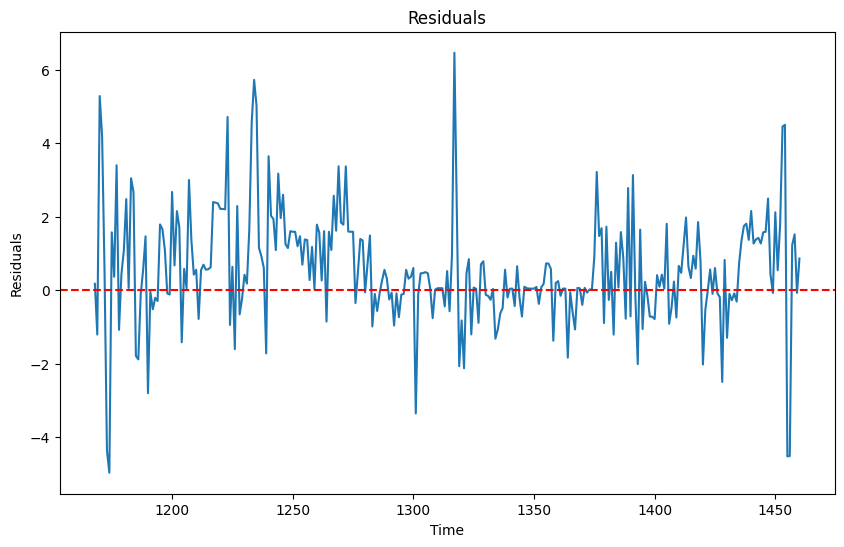

In [ ]:
import matplotlib.pyplot as plt

residuals = y_test - initial_model

plt.figure(figsize=(10, 6))
plt.plot(residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals')
plt.xlabel('Time')
plt.ylabel('Residuals')
plt.show()

In [ ]:
X_test.columns

Index(['stock_3_basic_resources_close_price', 'stock_11_real_estate_volume',
       'stock_3_basic_resources_volume', 'stock_5_banks_volume',
       'Europe Brent Crude Oil (Dollars per Barrel)', 'Core (m/m)', 'vix_OPEN',
       'gold_closing', 'gold_closing_7day_avg', 'gold_closing_lag_1'],
      dtype='object')

In [ ]:
X_test_with_residuals = X_test.copy()
X_test_with_residuals['initial_predictions'] = initial_model
X_test_with_residuals['residuals'] = residuals

In [ ]:
X_test_with_residuals.head()

,stock_3_basic_resources_close_price,stock_11_real_estate_volume,stock_3_basic_resources_volume,stock_5_banks_volume,Europe Brent Crude Oil (Dollars per Barrel),Core (m/m),vix_OPEN,gold_closing,gold_closing_7day_avg,gold_closing_lag_1,initial_predictions,residuals
1168,27.80,1.475416e+06,6.940600e+05,4.918377e+06,76.77,2.54,26.85,2194.0,2132.714286,2131.0,-0.172290,0.172290
1169,25.97,2.776872e+06,1.304140e+06,9.397878e+06,74.30,2.54,23.21,2194.0,2146.571429,2194.0,1.208192,-1.208192
1170,26.88,3.214370e+06,1.814228e+06,7.372955e+06,73.12,2.54,26.19,2194.0,2158.000000,2194.0,-0.045955,5.287523
1171,26.88,2.142913e+06,1.209485e+06,4.915303e+06,71.03,2.54,22.92,2309.0,2183.428571,2194.0,0.235967,4.181530
1172,26.88,1.071457e+06,6.047427e+05,2.457652e+06,71.03,2.54,22.92,2411.0,2223.428571,2309.0,-0.521348,0.521348


Training to predict Residuals

In [ ]:
import xgboost as xgb
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

Xx = X_test_with_residuals.drop(['residuals', 'initial_predictions'], axis = 1)
yy = X_test_with_residuals['residuals']

Xx_train, Xx_test, yy_train, yy_test = train_test_split(Xx, yy, test_size=0.2, shuffle=False)


import xgboost as xgb
residual_model = XGBRegressor(
    n_estimators=100,
    booster='dart',
    rate_drop=0.1,
    sample_type='uniform',
    normalize_type='tree'
)
residual_model.fit(X_train, y_train)

residual_predictions = residual_model.predict(Xx_test)


In [ ]:
import time
from sklearn.metrics import mean_squared_error
import numpy as np

start_time = time.time()
end_time = time.time()
inference_time = end_time - start_time

rmse = np.sqrt(mean_squared_error(yy_test, yy_preds))

mda = np.mean(np.sign(np.diff(yy_test)) == np.sign(np.diff(yy_preds)))

y_test_buckets = pd.qcut(yy_test, 4, labels=False)
y_pred_buckets = pd.qcut(yy_preds, 4, labels=False)
f1 = f1_score(y_test_buckets, y_pred_buckets, average='weighted')

print(f'Root Mean Squared Error: {rmse}')
print(f'Mean Directional Accuracy: {mda}')
print(f'Bucketized F1 Score: {f1}')
print(f'Inference Time (seconds): {inference_time}')

Root Mean Squared Error: 2.14999324020853
Mean Directional Accuracy: 0.3448275862068966
Bucketized F1 Score: 0.14982582194738828
Inference Time (seconds): 2.4318695068359375e-05


No good pattern detected.

**Try another method to forecast residuals univariately**

In [ ]:
! pip install prophet

In [ ]:
df = X_test_with_residuals['residuals']

In [ ]:
df.shape

(293,)

In [ ]:
dfx = df[0:200]

In [ ]:
from prophet import Prophet
import pandas as pd

df = X_test_with_residuals['residuals']
dfx = df[0:200]
dates = pd.date_range(start='2023-03-14', periods=200)
data = pd.DataFrame({'ds': dates, 'y': dfx.values})
m = Prophet()
m.fit(data)

future = m.make_future_dataframe(periods=93)

predictions = m.predict(future)

print(predictions)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3hbqduez/o7xmqey0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3hbqduez/gy_qgrrf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=91700', 'data', 'file=/tmp/tmp3hbqduez/o7xmqey0.json', 'init=/tmp/tmp3hbqduez/gy_qgrrf.json', 'output', 'file=/tmp/tmp3hbqduez/prophet_modelm7c9d5pp/prophet_model-20241013201546.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
20:15:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:15:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


            ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2023-03-14  1.166016   -1.077345    2.764869     1.166016     1.166016   
1   2023-03-15  1.161083   -0.810838    2.816536     1.161083     1.161083   
2   2023-03-16  1.156149   -0.293949    3.546541     1.156149     1.156149   
3   2023-03-17  1.151215   -0.546540    3.233234     1.151215     1.151215   
4   2023-03-18  1.146281   -0.789226    2.958331     1.146281     1.146281   
..         ...       ...         ...         ...          ...          ...   
288 2023-12-27 -0.663623   -2.693471    1.101897    -0.687881    -0.641486   
289 2023-12-28 -0.670538   -1.800279    1.793826    -0.694990    -0.648007   
290 2023-12-29 -0.677453   -2.391931    1.182215    -0.702427    -0.654415   
291 2023-12-30 -0.684369   -2.470360    1.296408    -0.709702    -0.660830   
292 2023-12-31 -0.691284   -3.101795    0.414580    -0.716890    -0.667245   

     additive_terms  additive_terms_lower  additive_terms_upper

In [ ]:
actual_values = df.tail(100).values

# Extract the last 100 predicted values
predicted_values = predictions['yhat'].tail(100).values

# Create a comparison DataFrame
comparison_df = pd.DataFrame({
    'Actual': actual_values,
    'Predicted': predicted_values
})

In [ ]:
# Measure inference time
import time
from sklearn.metrics import mean_squared_error
import numpy as np

start_time = time.time()
end_time = time.time()
inference_time = end_time - start_time

    # Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(actual_values, predicted_values))

    # Calculate Mean Directional Accuracy (MDA)
mda = np.mean(np.sign(np.diff(actual_values)) == np.sign(np.diff(predicted_values)))

    # Bucketize the true and predicted values into quartiles and calculate F1 score
y_test_buckets = pd.qcut(actual_values, 4, labels=False)
y_pred_buckets = pd.qcut(predicted_values, 4, labels=False)
f1 = f1_score(y_test_buckets, y_pred_buckets, average='weighted')

    # Print the evaluation metrics
print(f'Root Mean Squared Error: {rmse}')
print(f'Mean Directional Accuracy: {mda}')
print(f'Bucketized F1 Score: {f1}')
print(f'Inference Time (seconds): {inference_time}')

Root Mean Squared Error: 1.6398068758468853
Mean Directional Accuracy: 0.5757575757575758
Bucketized F1 Score: 0.29
Inference Time (seconds): 2.5033950805664062e-05


Low F1 score, can't enhance my initial model.

# VAR

In [ ]:
import pandas as pd
from statsmodels.tsa.stattools import grangercausalitytests

data_granger = data.drop(['Date', 'target_pct_change'], axis=1)

max_lag = 7

significant_features = []

for col in data_granger.columns:
    if col != 'gold_closing':
        test_result = grangercausalitytests(data_granger[['gold_closing', col]], max_lag)

        p_values = [round(test[0]['ssr_ftest'][1], 4) for test in test_result.values()]

        if any(p < 0.05 for p in p_values):
            significant_features.append(col)

print("Significant features (p-value < 0.05):")
print(significant_features)



Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.6276  , p=0.2022  , df_denom=1457, df_num=1
ssr based chi2 test:   chi2=1.6310  , p=0.2016  , df=1
likelihood ratio test: chi2=1.6301  , p=0.2017  , df=1
parameter F test:         F=1.6276  , p=0.2022  , df_denom=1457, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.0348  , p=0.3556  , df_denom=1454, df_num=2
ssr based chi2 test:   chi2=2.0767  , p=0.3540  , df=2
likelihood ratio test: chi2=2.0752  , p=0.3543  , df=2
parameter F test:         F=1.0348  , p=0.3556  , df_denom=1454, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=7.1351  , p=0.0001  , df_denom=1451, df_num=3
ssr based chi2 test:   chi2=21.5087 , p=0.0001  , df=3
likelihood ratio test: chi2=21.3516 , p=0.0001  , df=3
parameter F test:         F=7.1351  , p=0.0001  , df_denom=1451, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=5.7133  , p=0.

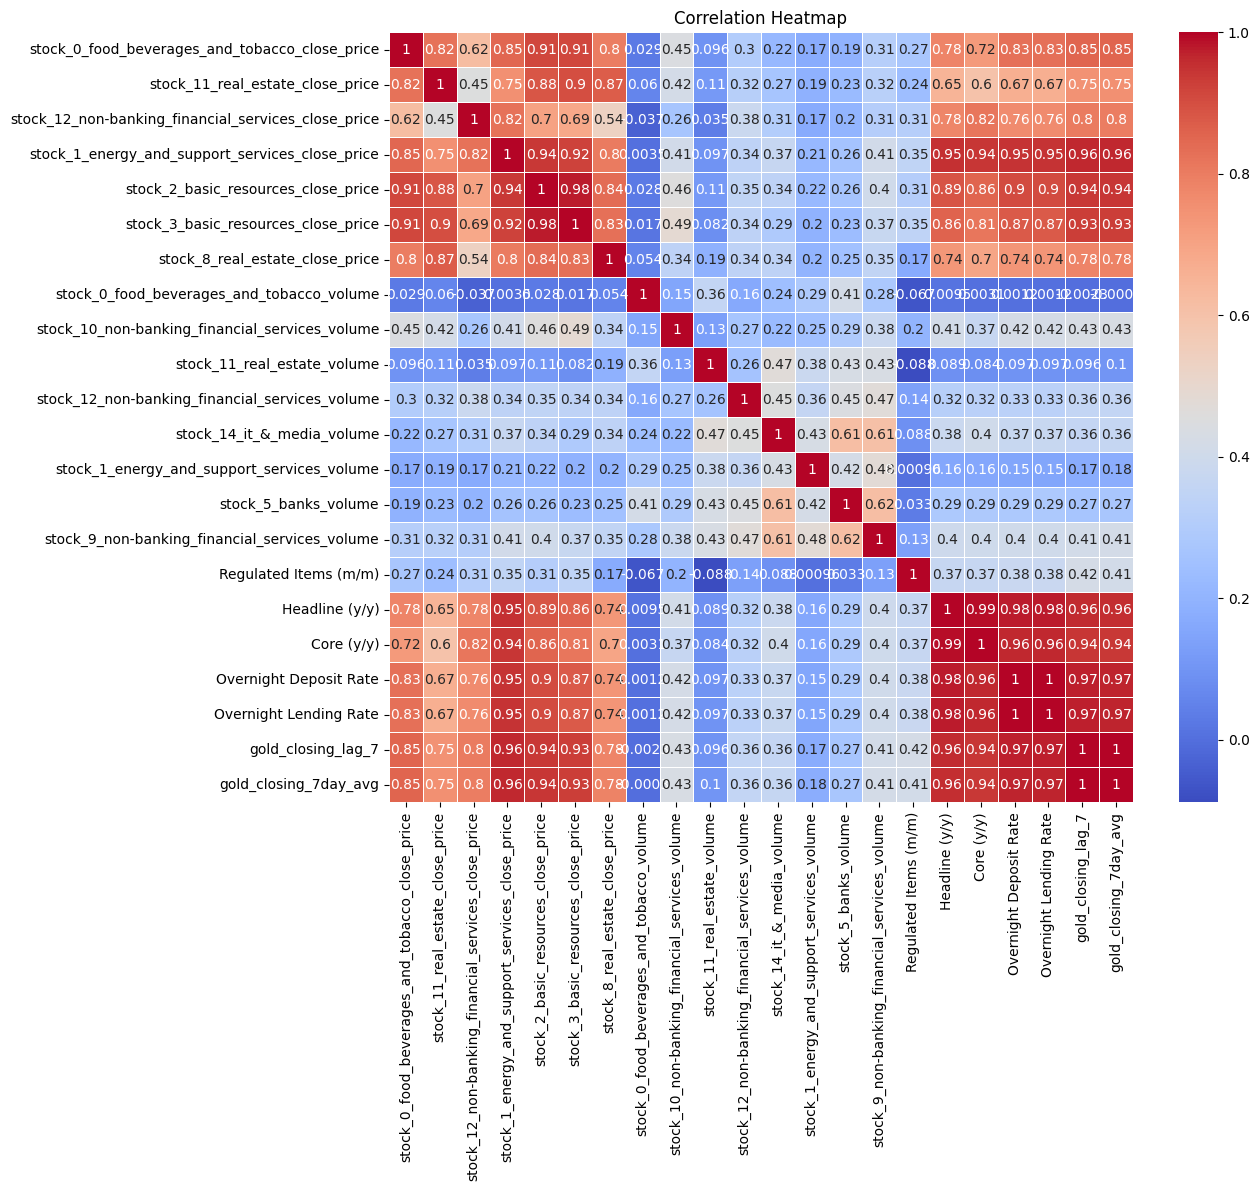

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = data[significant_features].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
import pandas as pd
import numpy as np

corr_matrix = data[significant_features].corr().abs()
upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.5)]
filtered_features = [feature for feature in significant_features if feature not in to_drop]

In [ ]:
print("Filtered features (after removing highly correlated features):")
print(filtered_features)


Filtered features (after removing highly correlated features):
['stock_0_food_beverages_and_tobacco_close_price', 'stock_0_food_beverages_and_tobacco_volume', 'stock_10_non-banking_financial_services_volume', 'stock_11_real_estate_volume', 'stock_12_non-banking_financial_services_volume', 'stock_14_it_&_media_volume', 'stock_1_energy_and_support_services_volume', 'Regulated Items (m/m)']


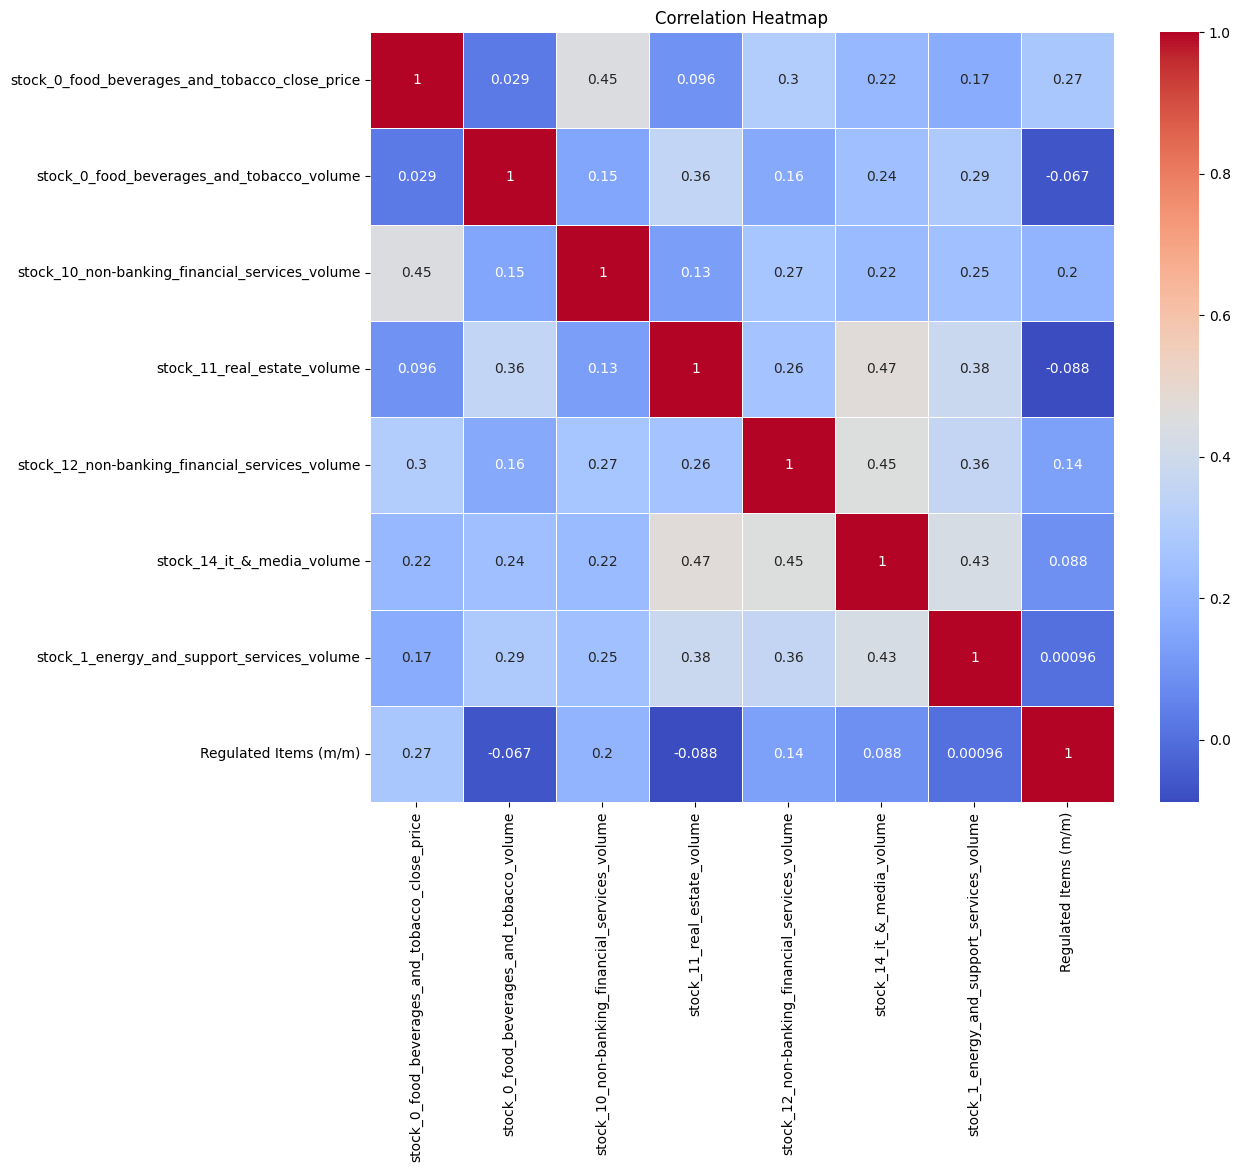

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = data[filtered_features].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
data1 = data.copy().sort_values('Date')
data_var = data1[filtered_features + ['gold_closing']]
data_var.isna().sum()

,0
stock_0_food_beverages_and_tobacco_close_price,0
stock_0_food_beverages_and_tobacco_volume,0
stock_10_non-banking_financial_services_volume,0
stock_11_real_estate_volume,0
stock_12_non-banking_financial_services_volume,0
stock_14_it_&_media_volume,0
stock_1_energy_and_support_services_volume,0
Regulated Items (m/m),0
gold_closing,0


In [ ]:
import pandas as pd
from statsmodels.tsa.api import VAR

results = {}
max_lags = 15

for lag in range(1, max_lags + 1):
    model = VAR(data_var)
    fitted_model = model.fit(maxlags=lag, ic='aic')
    results[lag] = {'AIC': fitted_model.aic, 'BIC': fitted_model.bic}

results_df = pd.DataFrame(results).T
print(results_df)

optimal_lag_aic = results_df['AIC'].idxmin()
optimal_lag_bic = results_df['BIC'].idxmin()

print(f'Optimal Lag Length based on AIC: {optimal_lag_aic}')
print(f'Optimal Lag Length based on BIC: {optimal_lag_bic}')

           AIC         BIC
1   177.128811  177.454672
2   176.960800  177.580280
3   176.921201  177.834627
4   176.921201  177.834627
5   176.789589  178.291888
6   176.581511  178.378739
7   176.357057  178.449543
8   176.198232  178.586305
9   176.198232  178.586305
10  176.198232  178.586305
11  176.198232  178.586305
12  176.198232  178.586305
13  176.198232  178.586305
14  176.198232  178.586305
15  176.239007  180.705469
Optimal Lag Length based on AIC: 8
Optimal Lag Length based on BIC: 1


**AIC = 8**

In [ ]:
model = VAR(data_var)
fitted_model = model.fit(maxlags=8, ic ='aic')

print(fitted_model.summary())

forecast = fitted_model.forecast(data_var.values[-fitted_model.k_ar:], steps=1)
predicted_gold_closing = forecast[0, -1]  # gold closing price last feature

print("Predicted Gold Closing Price for Tomorrow:", predicted_gold_closing)

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sat, 12, Oct, 2024
Time:                     11:02:27
--------------------------------------------------------------------
No. of Equations:         9.00000    BIC:                    178.586
Nobs:                     1453.00    HQIC:                   177.089
Log likelihood:          -145906.    FPE:                3.32852e+76
AIC:                      176.198    Det(Omega_mle):     2.14117e+76
--------------------------------------------------------------------
Results for equation stock_0_food_beverages_and_tobacco_close_price
                                                       coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------------------------------------------------
const                                                     0.053408         0.037690            1.417         

In [ ]:
data['gold_closing'].tail(1)

,gold_closing
1460,3634.0


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from statsmodels.tsa.api import VAR

train_data, test_data = train_test_split(data_var, test_size=0.2, shuffle=False)

predictions = []
dates = []

for i in range(len(test_data)):
    model = VAR(train_data)
    fitted_model = model.fit(maxlags=8, ic='aic')

    forecast = fitted_model.forecast(train_data.values[-fitted_model.k_ar:], steps=1)
    predicted_gold_closing = forecast[0, -1]  # only forecasting gold closing (last feature)

    predictions.append(predicted_gold_closing)
    dates.append(test_data.index[i])

    train_data = pd.concat([train_data, test_data.iloc[i:i+1]])

predicted_df = pd.DataFrame({
    'Date': data['Date'].iloc[-len(predictions):].values,
    'Actual Gold Closing': test_data['gold_closing'].values,
    'Predicted Gold Closing Tommorow': predictions
})

print(predicted_df)

          Date  Actual Gold Closing  Predicted Gold Closing
0   2023-03-14               2194.0             2144.598068
1   2023-03-15               2194.0             2194.376546
2   2023-03-16               2194.0             2194.336533
3   2023-03-17               2309.0             2208.249351
4   2023-03-18               2411.0             2332.674962
..         ...                  ...                     ...
288 2023-12-27               3691.0             3852.114755
289 2023-12-28               3531.0             3656.647644
290 2023-12-29               3577.0             3516.425623
291 2023-12-30               3634.0             3612.513229
292 2023-12-31               3634.0             3651.150718

[293 rows x 3 columns]


In [ ]:
predicted_df_1 = pd.merge(predicted_df, data[['Date', 'target_pct_change']], on='Date', how='inner')
print(predicted_df_1)


          Date  Actual Gold Closing  Predicted Gold Closing  target_pct_change
0   2023-03-14               2194.0             2144.598068           0.000000
1   2023-03-15               2194.0             2194.376546           0.000000
2   2023-03-16               2194.0             2194.336533           5.241568
3   2023-03-17               2309.0             2208.249351           4.417497
4   2023-03-18               2411.0             2332.674962           0.000000
..         ...                  ...                     ...                ...
288 2023-12-27               3691.0             3852.114755          -4.334869
289 2023-12-28               3531.0             3656.647644           1.302747
290 2023-12-29               3577.0             3516.425623           1.593514
291 2023-12-30               3634.0             3612.513229           0.000000
292 2023-12-31               3634.0             3651.150718           0.935608

[293 rows x 4 columns]


In [ ]:
predicted_df_1['predicted_pct_change'] = (predicted_df_1['Predicted Gold Closing'] - predicted_df_1['Actual Gold Closing']) / predicted_df_1['Actual Gold Closing']

In [ ]:
predicted_df_1.head()

,Date,Actual Gold Closing,Predicted Gold Closing,target_pct_change,predicted_pct_change
0,2023-03-14,2194.0,2144.598068,0.000000,-0.022517
1,2023-03-15,2194.0,2194.376546,0.000000,0.000172
2,2023-03-16,2194.0,2194.336533,5.241568,0.000153
3,2023-03-17,2309.0,2208.249351,4.417497,-0.043634
4,2023-03-18,2411.0,2332.674962,0.000000,-0.032487


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(predicted_df_1['target_pct_change'], predicted_df_1['predicted_pct_change'])
mse = mean_squared_error(predicted_df_1['target_pct_change'], predicted_df_1['predicted_pct_change'])
rmse = np.sqrt(mse)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Absolute Error: 0.8362682410085758
Mean Squared Error: 1.8994254631975558
Root Mean Squared Error (RMSE): 1.378196453049258


In [ ]:
import numpy as np

actual_direction = np.sign(predicted_df_1['target_pct_change'])
predicted_direction = np.sign(predicted_df_1['predicted_pct_change'])

mda = np.mean(actual_direction == predicted_direction)

print("Mean Directional Accuracy (MDA):", mda)


Mean Directional Accuracy (MDA): 0.3037542662116041


**BIC 1**

In [ ]:
model = VAR(data_var)
fitted_model = model.fit(maxlags=1, ic ='bic')

print(fitted_model.summary())

forecast = fitted_model.forecast(data_var.values[-fitted_model.k_ar:], steps=1)
predicted_gold_closing = forecast[0, -1]  # gold closing price last feature

print("Predicted Gold Closing Price for Tomorrow:", predicted_gold_closing)

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sat, 12, Oct, 2024
Time:                     12:54:26
--------------------------------------------------------------------
No. of Equations:         9.00000    BIC:                    177.455
Nobs:                     1460.00    HQIC:                   177.250
Log likelihood:          -147859.    FPE:                8.43463e+76
AIC:                      177.129    Det(Omega_mle):     7.93205e+76
--------------------------------------------------------------------
Results for equation stock_0_food_beverages_and_tobacco_close_price
                                                       coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------------------------------------------------
const                                                     0.052923         0.034636            1.528         

In [ ]:
data['gold_closing'].tail(1)

,gold_closing
1460,3634.0


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from statsmodels.tsa.api import VAR

train_data, test_data = train_test_split(data_var, test_size=0.2, shuffle=False)

predictions = []
dates = []

for i in range(len(test_data)):
    model = VAR(train_data)
    fitted_model = model.fit(maxlags=8, ic='bic')

    forecast = fitted_model.forecast(train_data.values[-fitted_model.k_ar:], steps=1)
    predicted_gold_closing = forecast[0, -1]

    predictions.append(predicted_gold_closing)
    dates.append(test_data.index[i])

    train_data = pd.concat([train_data, test_data.iloc[i:i+1]])

predicted_df = pd.DataFrame({
    'Date': data['Date'].iloc[-len(predictions):].values,
    'Actual Gold Closing': test_data['gold_closing'].values,
    'Predicted Gold Closing Tommorow': predictions
})

print(predicted_df)

          Date  Actual Gold Closing  Predicted Gold Closing Tommorow
0   2023-03-14               2194.0                      2132.611539
1   2023-03-15               2194.0                      2199.997107
2   2023-03-16               2194.0                      2200.342472
3   2023-03-17               2309.0                      2202.937020
4   2023-03-18               2411.0                      2321.382908
..         ...                  ...                              ...
288 2023-12-27               3691.0                      3820.670187
289 2023-12-28               3531.0                      3702.565014
290 2023-12-29               3577.0                      3540.424321
291 2023-12-30               3634.0                      3587.030661
292 2023-12-31               3634.0                      3644.811150

[293 rows x 3 columns]


In [ ]:
predicted_df_1 = pd.merge(predicted_df, data[['Date', 'target_pct_change']], on='Date', how='inner')
predicted_df_1['predicted_pct_change'] = (predicted_df_1['Predicted Gold Closing Tommorow'] - predicted_df_1['Actual Gold Closing']) / predicted_df_1['Actual Gold Closing']

          Date  Actual Gold Closing  Predicted Gold Closing Tommorow  \
0   2023-03-14               2194.0                      2132.611539   
1   2023-03-15               2194.0                      2199.997107   
2   2023-03-16               2194.0                      2200.342472   
3   2023-03-17               2309.0                      2202.937020   
4   2023-03-18               2411.0                      2321.382908   
..         ...                  ...                              ...   
288 2023-12-27               3691.0                      3820.670187   
289 2023-12-28               3531.0                      3702.565014   
290 2023-12-29               3577.0                      3540.424321   
291 2023-12-30               3634.0                      3587.030661   
292 2023-12-31               3634.0                      3644.811150   

     target_pct_change  
0             0.000000  
1             0.000000  
2             5.241568  
3             4.417497  
4         

In [ ]:
predicted_df_1.head()

,Date,Actual Gold Closing,Predicted Gold Closing Tommorow,target_pct_change,predicted_pct_change
0,2023-03-14,2194.0,2132.611539,0.000000,-0.027980
1,2023-03-15,2194.0,2199.997107,0.000000,0.002733
2,2023-03-16,2194.0,2200.342472,5.241568,0.002891
3,2023-03-17,2309.0,2202.937020,4.417497,-0.045935
4,2023-03-18,2411.0,2321.382908,0.000000,-0.037170


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(predicted_df_1['target_pct_change'], predicted_df_1['predicted_pct_change'])
mse = mean_squared_error(predicted_df_1['target_pct_change'], predicted_df_1['predicted_pct_change'])
rmse = np.sqrt(mse)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Absolute Error: 0.8357821845055106
Mean Squared Error: 1.8987886042340856
Root Mean Squared Error (RMSE): 1.3779653857169583


In [ ]:
import numpy as np

actual_direction = np.sign(predicted_df_1['target_pct_change'])
predicted_direction = np.sign(predicted_df_1['predicted_pct_change'])

mda = np.mean(actual_direction == predicted_direction)

print("Mean Directional Accuracy (MDA):", mda)


Mean Directional Accuracy (MDA): 0.3003412969283277


# VAR Analysis for pct change forecasting

In [ ]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller

result = adfuller(data_var['target_pct_change'])

adf_statistic = result[0]
p_value = result[1]
critical_values = result[4]

print("ADF Statistic:", adf_statistic)
print("p-value:", p_value)
print("Critical Values:")
for key, value in critical_values.items():
    print(f"  {key}: {value}")

if p_value < 0.05:
    print("The series is stationary (reject H0).")
else:
    print("The series is non-stationary (fail to reject H0).")


ADF Statistic: -8.84051023362181
p-value: 1.6734444803803423e-14
Critical Values:
  1%: -3.434874123222469
  5%: -2.8635380960841084
  10%: -2.5678337706609993
The series is stationary (reject H0).


In [ ]:
import pandas as pd
from statsmodels.tsa.stattools import grangercausalitytests

data_granger = data.drop(['Date'], axis=1)

max_lag = 10

significant_features = []

for col in data_granger.columns:
    if col != 'target_pct_change':
        test_result = grangercausalitytests(data_granger[['target_pct_change', col]], max_lag)

        p_values = [round(test[0]['ssr_ftest'][1], 4) for test in test_result.values()]

        if any(p < 0.05 for p in p_values):
            significant_features.append(col)

print("Significant features (p-value < 0.05):")
print(significant_features)



Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.1154  , p=0.1460  , df_denom=1457, df_num=1
ssr based chi2 test:   chi2=2.1198  , p=0.1454  , df=1
likelihood ratio test: chi2=2.1183  , p=0.1456  , df=1
parameter F test:         F=2.1154  , p=0.1460  , df_denom=1457, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=6.1284  , p=0.0022  , df_denom=1454, df_num=2
ssr based chi2 test:   chi2=12.2989 , p=0.0021  , df=2
likelihood ratio test: chi2=12.2474 , p=0.0022  , df=2
parameter F test:         F=6.1284  , p=0.0022  , df_denom=1454, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=4.1875  , p=0.0058  , df_denom=1451, df_num=3
ssr based chi2 test:   chi2=12.6232 , p=0.0055  , df=3
likelihood ratio test: chi2=12.5688 , p=0.0057  , df=3
parameter F test:         F=4.1875  , p=0.0058  , df_denom=1451, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=3.2169  , p=0.

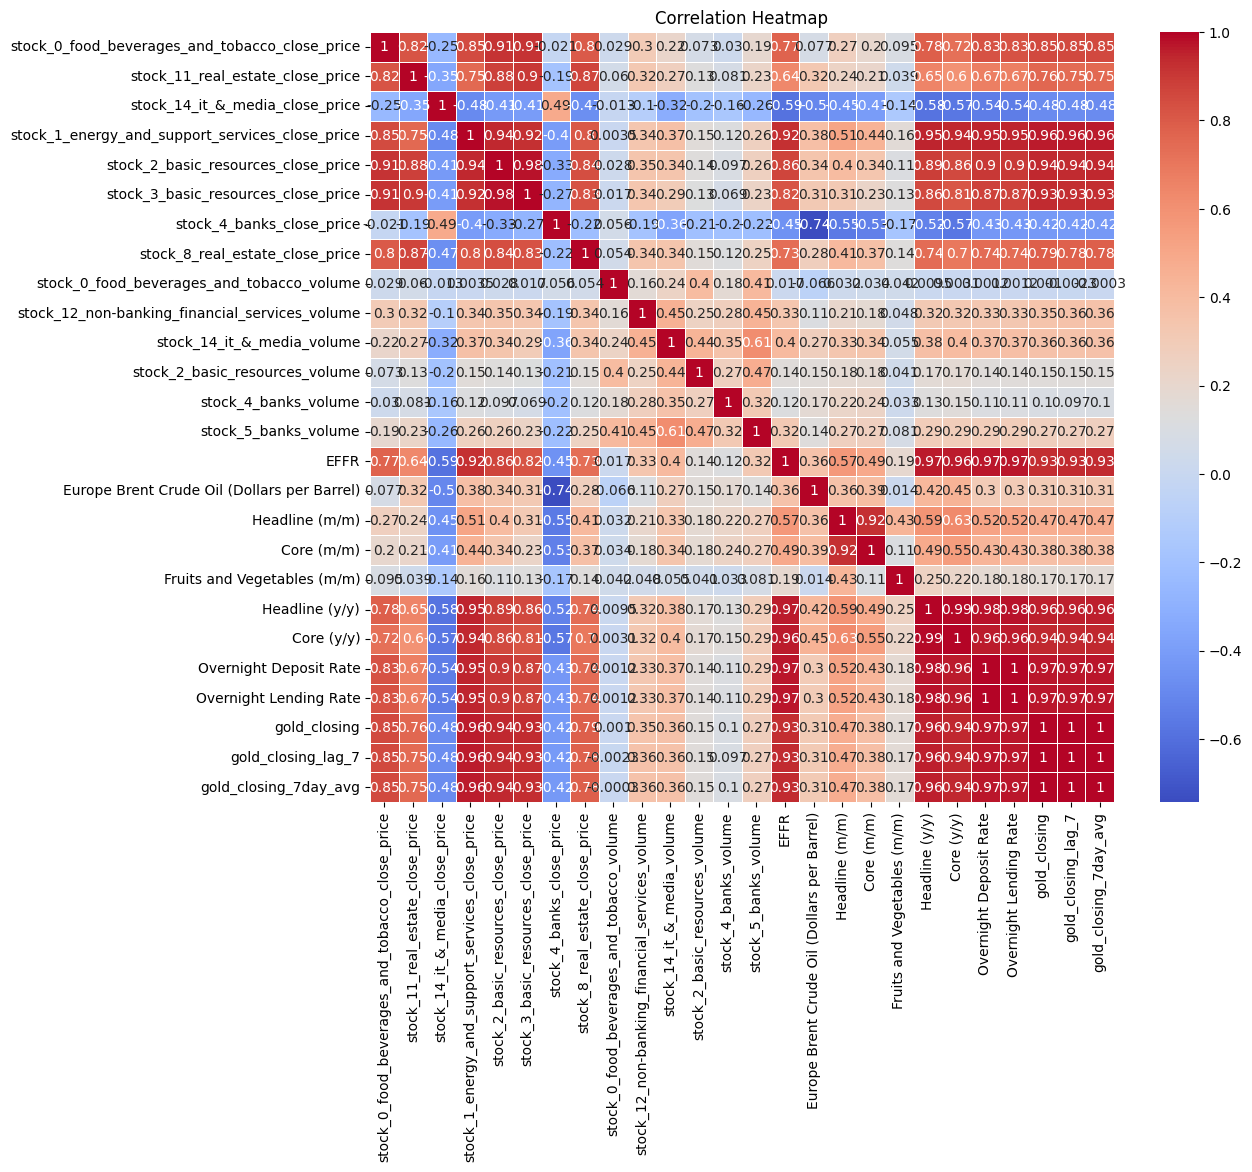

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = data[significant_features].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
import pandas as pd
import numpy as np

corr_matrix = data[significant_features].corr().abs()
upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.5)]
filtered_features = [feature for feature in significant_features if feature not in to_drop]

In [ ]:
print("Filtered features (after removing highly correlated features):")
print(filtered_features)

Filtered features (after removing highly correlated features):
['stock_0_food_beverages_and_tobacco_close_price', 'stock_14_it_&_media_close_price', 'stock_4_banks_close_price', 'stock_0_food_beverages_and_tobacco_volume', 'stock_12_non-banking_financial_services_volume', 'stock_14_it_&_media_volume', 'stock_2_basic_resources_volume', 'stock_4_banks_volume', 'Fruits and Vegetables (m/m)']


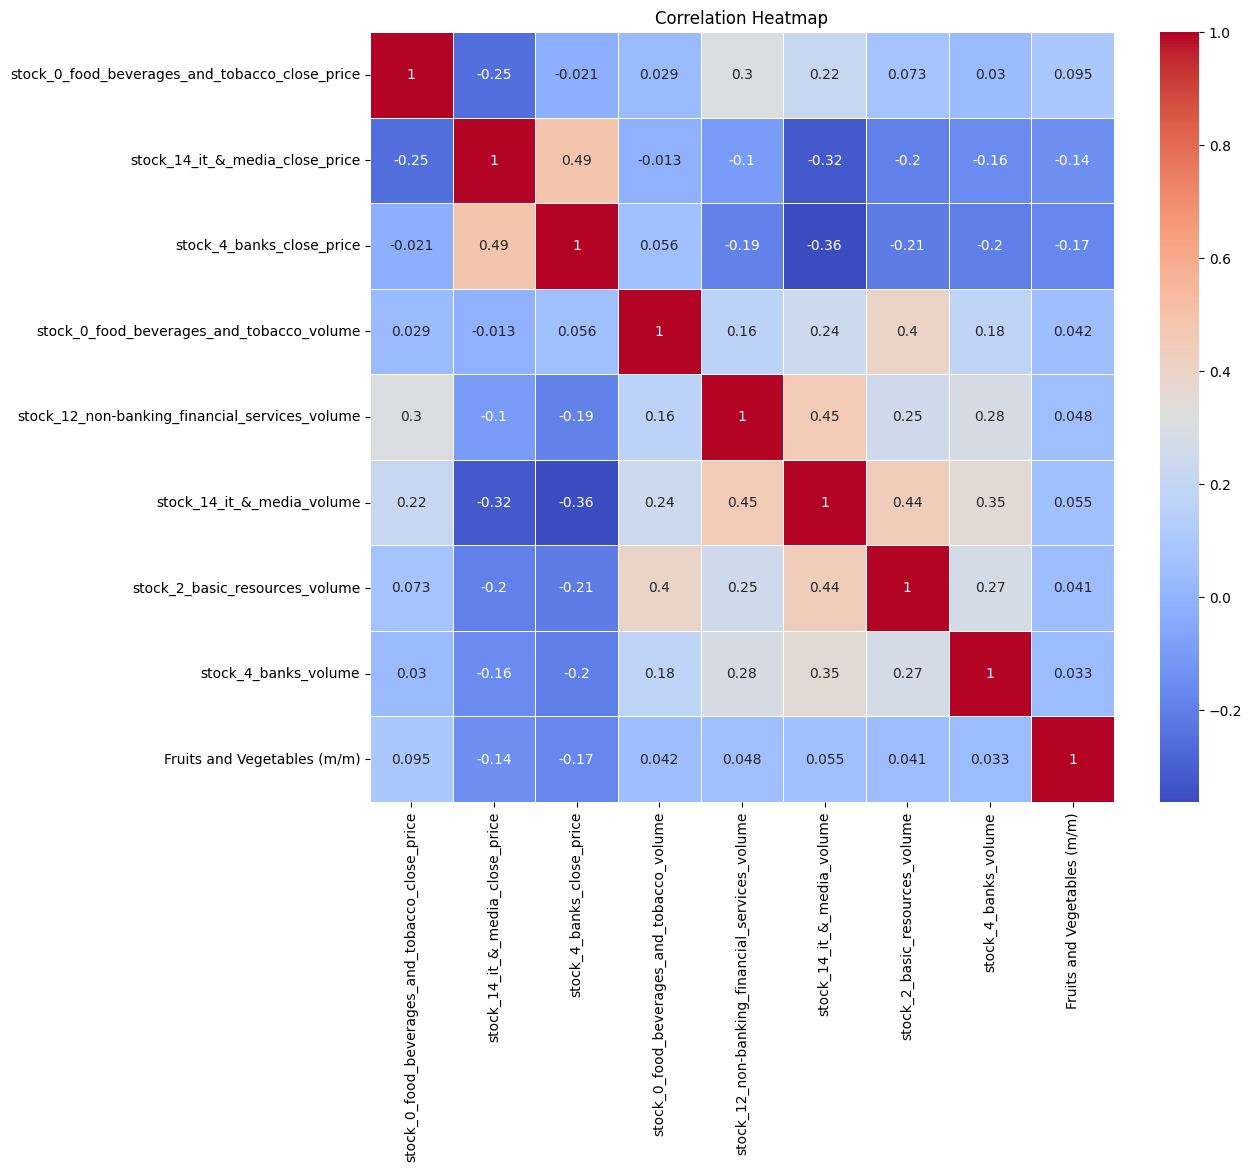

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = data[filtered_features].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
data1 = data.copy().sort_values('Date')
data_var = data1[filtered_features + ['target_pct_change']]
data_var.isna().sum()

,0
stock_0_food_beverages_and_tobacco_close_price,0
stock_14_it_&_media_close_price,0
stock_4_banks_close_price,0
stock_0_food_beverages_and_tobacco_volume,0
stock_12_non-banking_financial_services_volume,0
stock_14_it_&_media_volume,0
stock_2_basic_resources_volume,0
stock_4_banks_volume,0
Fruits and Vegetables (m/m),0
target_pct_change,0


In [ ]:
import pandas as pd
from statsmodels.tsa.api import VAR

results = {}
max_lags = 15

for lag in range(1, max_lags + 1):
    model = VAR(data_var)
    fitted_model = model.fit(maxlags=lag, ic='aic')
    results[lag] = {'AIC': fitted_model.aic, 'BIC': fitted_model.bic}

results_df = pd.DataFrame(results).T
print(results_df)

optimal_lag_aic = results_df['AIC'].idxmin()
optimal_lag_bic = results_df['BIC'].idxmin()

print(f'Optimal Lag Length based on AIC: {optimal_lag_aic}')
print(f'Optimal Lag Length based on BIC: {optimal_lag_bic}')

           AIC         BIC
1   136.020153  136.418428
2   135.967160  136.727926
3   135.967160  136.727926
4   135.967160  136.727926
5   135.967160  136.727926
6   135.872138  138.086904
7   135.774397  138.353676
8   135.769729  138.713929
9   135.769729  138.713929
10  135.769729  138.713929
11  135.769729  138.713929
12  135.769729  138.713929
13  135.769729  138.713929
14  135.769729  138.713929
15  135.769729  138.713929
Optimal Lag Length based on AIC: 8
Optimal Lag Length based on BIC: 1


# Full VAR model forecasting percentage change

In [ ]:
import pandas as pd
import numpy as np

target= pd.read_csv('/content/target_gold.csv')
target.rename(columns={'date': 'Date'}, inplace=True)
target = target.rename(columns=lambda x: 'target_' + x if x != 'Date' else x)
target['Date'] = pd.to_datetime(target['Date'])



vix = pd.read_csv('/content/vix_index.csv')
vix = vix.rename(columns=lambda x: 'vix_' + x if x != 'Date' else x)
vix['Date'] = pd.to_datetime(vix['Date'])

vxeem = pd.read_csv('/content/vxeem_index.csv')
vxeem = vxeem.rename(columns=lambda x: 'vxeem_' + x if x != 'Date' else x)
vxeem['Date'] = pd.to_datetime(vxeem['Date'])

data = pd.read_csv('/content/dataset.csv')
data['Date'] = pd.to_datetime(data['Date'])

cols_to_drop = ['Open', 'High', 'Low',  'OPEN_x', 'HIGH_x', 'LOW_x', 'CLOSE_x', 'OPEN_y', 'HIGH_y', 'LOW_y', 'CLOSE_y']
data = data.drop(columns=cols_to_drop)
data = data.rename(columns={'Close': 'gold_closing'})

data = pd.merge(data, vxeem, on='Date', how='left')
data = pd.merge(data, vix, on='Date', how='left')
data = pd.merge(data, target, on='Date', how='left')

cols = list(data.columns)
cols.remove('gold_closing')
cols.append('gold_closing')
data = data[cols]
data = data.fillna(method='ffill')
data = data.fillna(method='bfill')

def create_lagged_and_rolling_features(data, lag_days=7, window_size=7):

    data[f'gold_closing_lag_{lag_days}'] = data['gold_closing'].shift(lag_days)
    data[f'gold_closing_{window_size}day_avg'] = data['gold_closing'].rolling(window=window_size).mean()

    return data

data = create_lagged_and_rolling_features(data, lag_days=7, window_size=7)

data[f'gold_closing_lag_7'] = data[f'gold_closing_lag_7'].fillna(data['gold_closing'])
data[f'gold_closing_7day_avg'] = data[f'gold_closing_7day_avg'].fillna(data['gold_closing'])


from statsmodels.tsa.stattools import grangercausalitytests

data_granger = data.drop(['Date'], axis=1)

max_lag = 10

significant_features = []

for col in data_granger.columns:
    if col != 'target_pct_change':
        test_result = grangercausalitytests(data_granger[['target_pct_change', col]], max_lag)

        p_values = [round(test[0]['ssr_ftest'][1], 4) for test in test_result.values()]

        if any(p < 0.05 for p in p_values):
            significant_features.append(col)


corr_matrix = data[significant_features].corr().abs()
upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.5)]
filtered_features = [feature for feature in significant_features if feature not in to_drop]

data1 = data.copy().sort_values('Date')
data_var = data1[filtered_features + ['target_pct_change']]

<ipython-input-123-b1703397f57b>:38: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data = data.fillna(method='ffill')
<ipython-input-123-b1703397f57b>:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data = data.fillna(method='bfill')



Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.1154  , p=0.1460  , df_denom=1457, df_num=1
ssr based chi2 test:   chi2=2.1198  , p=0.1454  , df=1
likelihood ratio test: chi2=2.1183  , p=0.1456  , df=1
parameter F test:         F=2.1154  , p=0.1460  , df_denom=1457, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=6.1284  , p=0.0022  , df_denom=1454, df_num=2
ssr based chi2 test:   chi2=12.2989 , p=0.0021  , df=2
likelihood ratio test: chi2=12.2474 , p=0.0022  , df=2
parameter F test:         F=6.1284  , p=0.0022  , df_denom=1454, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=4.1875  , p=0.0058  , df_denom=1451, df_num=3
ssr based chi2 test:   chi2=12.6232 , p=0.0055  , df=3
likelihood ratio test: chi2=12.5688 , p=0.0057  , df=3
parameter F test:         F=4.1875  , p=0.0058  , df_denom=1451, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=3.2169  , p=0.

In [ ]:
import pickle
from sklearn.model_selection import train_test_split
from statsmodels.tsa.api import VAR

train_data, test_data = train_test_split(data_var, test_size=0.2, shuffle=False)

predictions = []
dates = []
final_fitted_model = None

for i in range(len(test_data)):
    model = VAR(train_data)
    fitted_model = model.fit(maxlags=8, ic='aic')

    forecast = fitted_model.forecast(train_data.values[-fitted_model.k_ar:], steps=1)
    predicted_gold = forecast[0, -1]

    predictions.append(predicted_gold)
    dates.append(test_data.index[i])

    train_data = pd.concat([train_data, test_data.iloc[i:i+1]])
    final_fitted_model = fitted_model

with open('final_var_model.pkl', 'wb') as f:
    pickle.dump(final_fitted_model, f)

print("Final VAR model saved to final_var_model.pkl")

# Create DataFrame for predicted values and actual values
predicted_df = pd.DataFrame({
    'Date': data['Date'].iloc[-len(predictions):].values,
    'Actual pct change': test_data['target_pct_change'].values,
    'Predicted pct change': predictions
})

print(predicted_df.head())  # Display the top of the predicted vs actual dataframe

Final VAR model saved to final_var_model.pkl
        Date  Actual pct change  Predicted pct change
0 2023-03-14           0.000000             -0.299303
1 2023-03-15           0.000000             -0.026452
2 2023-03-16           5.241568              0.434842
3 2023-03-17           4.417497              0.747285
4 2023-03-18           0.000000              1.494420


In [ ]:
import numpy as np

actual_direction = np.sign(predicted_df['Actual pct change'])
predicted_direction = np.sign(predicted_df['Predicted pct change'])

mda = np.mean(actual_direction == predicted_direction)

print("Mean Directional Accuracy (MDA):", mda)

Mean Directional Accuracy (MDA): 0.32764505119453924


In [ ]:
from sklearn.metrics import f1_score

predicted_df['Actual Direction'] = predicted_df['Actual pct change'].apply(lambda x: 1 if x > 0 else 0)
predicted_df['Predicted Direction'] = predicted_df['Predicted pct change'].apply(lambda x: 1 if x > 0 else 0)

f1 = f1_score(predicted_df['Actual Direction'], predicted_df['Predicted Direction'])
print(f"F1 Score: {f1:.2f}")


F1 Score: 0.44


# SARIMAX with PCA

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
standardized_data = scaler.fit_transform(X)

pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(standardized_data)

print("Original shape:", X.shape)
print("Reduced shape:", X_pca.shape)

#  use X_pca as the new feature matrix in model

Original shape: (1461, 18)
Reduced shape: (1461, 17)


In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.model_selection import train_test_split

y = data_sarima['pct_change']

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, shuffle=False)

best_model = SARIMAX(y_train,
                      order=(4, 0, 1),
                      seasonal_order=(0, 1, 4, 2),
                      exog=X_train)

best_results = best_model.fit(disp=False)

print(best_results.summary())

y_pred = best_results.predict(start=len(y_train), end=len(y_train) + len(y_test) - 1, exog=X_test)

print("Predictions on test set:", y_pred)

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                          SARIMAX Results                                           
Dep. Variable:                                   pct_change   No. Observations:                 1168
Model:             SARIMAX(4, 0, 1)x(0, 1, [1, 2, 3, 4], 2)   Log Likelihood               -1775.841
Date:                                      Sun, 13 Oct 2024   AIC                           3605.681
Time:                                              18:05:11   BIC                           3742.337
Sample:                                                   0   HQIC                          3657.231
                                                     - 1168                                         
Covariance Type:                                        opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0260      0.016  

In [ ]:
# Measure inference time
import time
from sklearn.metrics import mean_squared_error, f1_score
import numpy as np

start_time = time.time()
end_time = time.time()
inference_time = end_time - start_time

    # Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    # Calculate Mean Directional Accuracy (MDA)
mda = np.mean(np.sign(np.diff(y_test)) == np.sign(np.diff(y_pred)))

    # Bucketize the true and predicted values into quartiles and calculate F1 score
y_test_buckets = pd.qcut(y_test, 4, labels=False)
y_pred_buckets = pd.qcut(y_pred, 4, labels=False)
f1 = f1_score(y_test_buckets, y_pred_buckets, average='weighted')

    # Print the evaluation metrics
print(f'Root Mean Squared Error: {rmse}')
print(f'Mean Directional Accuracy: {mda}')
print(f'Bucketized F1 Score: {f1}')
print(f'Inference Time (seconds): {inference_time}')

Root Mean Squared Error: 1.3490283808372843
Mean Directional Accuracy: 0.4315068493150685
Bucketized F1 Score: 0.28166573796754196
Inference Time (seconds): 3.7670135498046875e-05


In [ ]:
import pickle
import time
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, f1_score

with open('/content/final_sarimax_model.pkl', 'rb') as model_file:
    loaded_model = pickle.load(model_file)

y_pred = loaded_model.predict(start=len(y_test), end=len(y_test) + len(X_test) - 1, exog=X_test)

In [ ]:
# Measure inference time
import time
from sklearn.metrics import mean_squared_error, f1_score
import numpy as np

start_time = time.time()
end_time = time.time()
inference_time = end_time - start_time

    # Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    # Calculate Mean Directional Accuracy (MDA)
mda = np.mean(np.sign(np.diff(y_test)) == np.sign(np.diff(y_pred)))

    # Bucketize the true and predicted values into quartiles and calculate F1 score
y_test_buckets = pd.qcut(y_test, 4, labels=False)
y_pred_buckets = pd.qcut(y_pred, 4, labels=False)
f1 = f1_score(y_test_buckets, y_pred_buckets, average='weighted')

    # Print the evaluation metrics
print(f'Root Mean Squared Error: {rmse}')
print(f'Mean Directional Accuracy: {mda}')
print(f'Bucketized F1 Score: {f1}')
print(f'Inference Time (seconds): {inference_time}')

Root Mean Squared Error: 1.3778046434011018
Mean Directional Accuracy: 0.3972602739726027
Bucketized F1 Score: 0.24579473427596293
Inference Time (seconds): 4.38690185546875e-05


# Optimizing SARIMAX (hyperparameter search)

In [ ]:
! pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 362.8/362.8 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.2/233.2 kB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 5.1 MB/s eta 0:00:00


In [ ]:
import optuna
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.model_selection import train_test_split

predictors = data_sarima.drop(columns = ['pct_change'])
response = data_sarima['pct_change']

X_train, X_test, y_train, y_test = train_test_split(predictors, response, test_size=0.2, shuffle=False)

def objective(trial):
    p = trial.suggest_int('p', 0, 5)  # Reduced range for faster search
    d = trial.suggest_int('d', 0, 2)  # Reduced range for faster search
    q = trial.suggest_int('q', 0, 5)  # Reduced range for faster search
    P = trial.suggest_int('P', 0, 5)  # Reduced range for faster search
    D = trial.suggest_int('D', 0, 2)  # Reduced range for faster search
    Q = trial.suggest_int('Q', 0, 5)  # Reduced range for faster search
    s = trial.suggest_int('s', 1, 12)  # Adjusted seasonal period

    if p == P or q == Q:
        return float('inf')

    try:
        model = SARIMAX(y_train,
                        order=(p, d, q),
                        seasonal_order=(P, D, Q, s),
                        exog=X_train)

        results = model.fit(disp=False, maxiter=50, method='lbfgs')

        return results.aic
    except ValueError:
        return float('inf')

study = optuna.create_study(pruner=optuna.pruners.HyperbandPruner())
study.optimize(objective, n_trials=50)

best_params = study.best_params
print("Best parameters:", best_params)
print("Best AIC:", study.best_value)

best_model = SARIMAX(y_train,
                      order=(best_params['p'], best_params['d'], best_params['q']),
                      seasonal_order=(best_params['P'], best_params['D'], best_params['Q'], best_params['s']),
                      exog=X_train)
best_results = best_model.fit(disp=False)

print(best_results.summary())

y_pred = best_results.predict(start=len(y_train), end=len(y_train) + len(y_test) - 1, exog=X_test)

print("Predictions on test set:", y_pred)

[I 2024-10-13 18:46:23,806] A new study created in memory with name: no-name-e85ce7ac-577e-48f1-a150-6fb398a50383
[I 2024-10-13 18:46:23,821] Trial 0 finished with value: inf and parameters: {'p': 4, 'd': 2, 'q': 1, 'P': 2, 'D': 1, 'Q': 4, 's': 3}. Best is trial 0 with value: inf.
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
[I 2024-10-13 18:48:11,133] Trial 1 finished with value: 3701.626658945324 and parameters: {'p': 0, 'd': 0, 'q': 0, 'P': 4, 'D': 1, 'Q': 5, 's': 7}. Best is trial 1 with value: 3701.626658945324.
[I 2024-10-13 18:48:11,146] Trial 2 finished with value: inf and parameters: {'p': 2, 'd': 1, 'q': 3, 'P': 3, 'D': 0, 'Q': 3, 's': 12}. Best is trial 1 with value: 3701.626658945324.
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimiz

Best parameters: {'p': 4, 'd': 0, 'q': 0, 'P': 0, 'D': 0, 'Q': 1, 's': 6}
Best AIC: 3604.7576545862357


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                      SARIMAX Results                                      
Dep. Variable:                          pct_change   No. Observations:                 1168
Model:             SARIMAX(4, 0, 0)x(0, 0, [1], 6)   Log Likelihood               -1778.379
Date:                             Sun, 13 Oct 2024   AIC                           3604.758
Time:                                     19:14:33   BIC                           3726.271
Sample:                                          0   HQIC                          3650.592
                                            - 1168                                         
Covariance Type:                               opg                                         
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
stock_6_real_estate_close_price   

In [ ]:
import time
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, f1_score

start_time = time.time()
y_pred = best_results.predict(start=len(y_train), end=len(y_train) + len(y_test) - 1, exog=X_test)

end_time = time.time()
inference_time = end_time - start_time

rmse = np.sqrt(mean_squared_error(y_test, y_pred))

mda = np.mean(np.sign(np.diff(y_test)) == np.sign(np.diff(y_pred)))

y_test_buckets = pd.qcut(y_test, 4, labels=False)
y_pred_buckets = pd.qcut(y_pred, 4, labels=False)
f1 = f1_score(y_test_buckets, y_pred_buckets, average='weighted')

print(f'Root Mean Squared Error: {rmse:.4f}')
print(f'Mean Directional Accuracy: {mda:.4f}')
print(f'Bucketized F1 Score: {f1:.4f}')
print(f'Inference Time (seconds): {inference_time:.4f}')

Root Mean Squared Error: 1.3558
Mean Directional Accuracy: 0.4521
Bucketized F1 Score: 0.3084
Inference Time (seconds): 0.0566
